dots = 250,000
act = 0.135335
est = 0.135136
err = 0.14725%


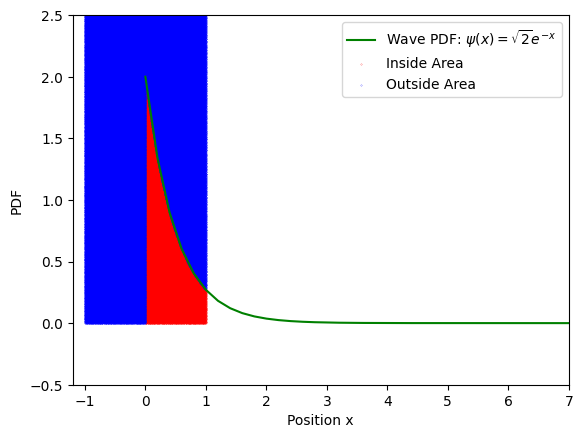

In [127]:
# Title: particle_location.ipynb
# Author: Charles "Chuck" Garcia

# Cell 1: Estimate PDF(x>=1) using Monte Carlo

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from numba import float64, vectorize


def show_results(act, est, err, dots):
    print(f"dots = {dots:,}")
    print(f"act = {act:.6f}")
    print(f"est = {est:.6f}")
    print(f"err = {err:.5%}")


@vectorize([float64(float64, float64)], nopython=True)
def halton(n: float, p: float):
    """
    Function written by David Biersach
    """
    h, f = 0, 1
    while n > 0:
        f = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


@vectorize([float64(float64, float64, float64)], nopython=True)
def wave_func(x: float, c: float, L: float):
    return c * np.exp(-x / L) if x >= 0 else 0


@vectorize([float64(float64)], nopython=True)
def inte_wave_func(x):
    """
    Integral of wave function from 0 to x
    """
    return 1 - np.exp(-2 * x) if x >= 0 else 0


def plot_wave_pdf(ax):
    """
    Plots wave function PDF
    """
    global c, L, x
    c = np.sqrt(2)
    L = 1
    x = np.linspace(0, 200, 1000)
    ax.plot(
        x,
        np.abs(wave_func(x, c, L)) ** 2,
        color="green",
        label=r"Wave PDF: $\psi(x) = \sqrt{2}e^{-x}$",
    )


def plot_mc_wave(ax):
    """
    Plots Monte Carlo approximation of wave function
    """
    sqrd_wave = lambda a: pow(np.abs(wave_func(a, c, L)), 2)

    # Scales the sample region
    x_scale = 2
    y_scale = sqrd_wave(0) * 1.5

    # Monte Carlo computation
    dots = 250_000
    x_random = (1 - halton(np.arange(dots), 2)) * x_scale - 1
    y_random = (1 - halton(np.arange(dots), 3)) * y_scale

    # Calculate Plotting Data
    d = y_random - sqrd_wave(x_random)
    x_in = x_random[d <= 0.0]
    y_in = y_random[d <= 0.0]
    x_out = x_random[d > 0.0]
    y_out = y_random[d > 0.0]

    # Compute and Show Error
    act = 1 - inte_wave_func(1)
    est = 1 - (np.count_nonzero(d <= 0.0) / dots * x_scale * y_scale)
    err = np.abs((est - act) / act)
    show_results(act, est, err, dots)

    # Graph Inside and Outside Points
    plt.scatter(x_in, y_in, color="red", marker=".", s=0.1, label="Inside Area")
    plt.scatter(x_out, y_out, color="blue", marker=".", s=0.1, label="Outside Area")


def main():
    # Initialize
    plt.figure(" ")
    ax = plt.gca()

    # Plot
    plot_wave_pdf(ax)
    plot_mc_wave(ax)

    # Plot Config
    plt.xlim(-1.2, 7)
    plt.ylim(-0.5, 2.5)
    plt.xlabel("Position x")
    plt.ylabel("PDF")
    plt.legend(loc="upper right")
    plt.show()


main()

In [128]:
# Cell 2: Numerically estimate using Scipy.integrate

sqrd_wave = lambda a: pow(np.abs(wave_func(a, c, L)), 2)
dots = 250_000

act = 1 - inte_wave_func(1)
est = 1 - quad(func=sqrd_wave, a=0, b=1)[0]
err = np.abs((est - act) / act)

show_results(act, est, err, dots)

dots = 250,000
act = 0.135335
est = 0.135335
err = 0.00000%
